# Lab 2: K Fold Cross Validation

In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [4]:
digits = load_digits()

In [5]:
# Separate between inputs and outputs features 
X = digits.data
y = digits.target

In [6]:
len(X)

1797

In [12]:
X[130]

array([ 0.,  0.,  2., 12.,  9.,  0.,  0.,  0.,  0.,  0., 11., 15., 12.,
        5.,  0.,  0.,  0.,  0., 15.,  5.,  0., 14.,  0.,  0.,  0.,  2.,
       15.,  1.,  0.,  9.,  7.,  0.,  0.,  4., 10.,  0.,  0.,  7.,  8.,
        0.,  0.,  0., 12.,  0.,  0.,  8., 10.,  0.,  0.,  2., 15.,  5.,
       10., 16.,  1.,  0.,  0.,  0.,  5., 14., 12.,  4.,  0.,  0.])

In [13]:
y[130]

0

<Figure size 640x480 with 0 Axes>

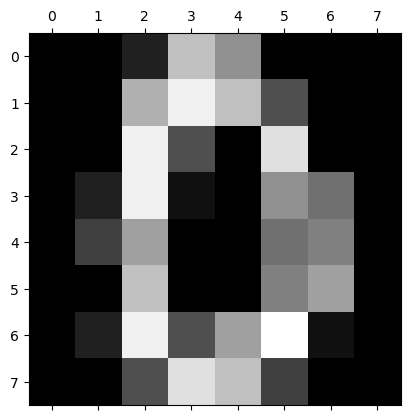

In [14]:
plt.gray()
plt.matshow(digits.images[130])

In [15]:
# Separate training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Modeling

In [17]:
def calc_score(model, X_train, X_test, y_train, y_test):
 model.fit(X_train, y_train)
 return model.score(X_test, y_test)

In [18]:
# Logistic Regression 
lr = LogisticRegression(solver='liblinear')
# lr.fit(X_train, y_train)
# lr.score(X_test, y_test)
calc_score(lr, X_train, X_test, y_train, y_test)

0.9611111111111111

In [19]:
# Support Vector Machine
svm = SVC(gamma='auto')
calc_score(svm, X_train, X_test, y_train, y_test)


0.4148148148148148

In [20]:
# Random Forest
rf = RandomForestClassifier(n_estimators=40)
calc_score(rf, X_train, X_test, y_train, y_test)

0.9666666666666667

## KFold

In [21]:
cross_val_score(LogisticRegression(solver='liblinear'), X, y, cv=5)

array([0.92222222, 0.88333333, 0.95264624, 0.95821727, 0.89415042])

In [22]:
cross_val_score(SVC(gamma='auto'), X, y, cv=3).mean()

0.4346132442960489

In [23]:
cross_val_score(RandomForestClassifier(n_estimators=40), X, y, cv=3).mean()

0.934891485809683